In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:/Users/20101/Desktop/penguins/penguins.csv')

data.head()


,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [10]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [11]:
numeric_features = data.select_dtypes(include=[np.number]).columns

In [12]:
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [13]:
data = data[~((data[numeric_features] < (Q1 - 1.5 * IQR)) | (data[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
scaler = StandardScaler()

In [33]:
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [34]:
X = data.drop(columns=['species'])
y = data['species']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Data preprocessing complete.")

Data preprocessing complete.


In [45]:
X_train.to_csv('C:/Users/20101/Desktop/penguins/X_train.csv', index=False)
X_test.to_csv('C:/Users/20101/Desktop/penguins/X_test.csv', index=False)
y_train.to_csv('C:/Users/20101/Desktop/penguins/y_train.csv', index=False)
y_test.to_csv('C:/Users/20101/Desktop/penguins/y_test.csv', index=False)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
print("Processed Data Information:")
print(data.info())

print("Processed Data Description:")
print(data.describe())

Processed Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    float64
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.3+ KB
None
Processed Data Description:
               id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000    3.420000e+02   3.420000e+02       3.420000e+02   
mean     0.000000    1.662088e-16   3.739699e-16      -8.725963e-16   
std      1.001457    1.001465e+00   1.001

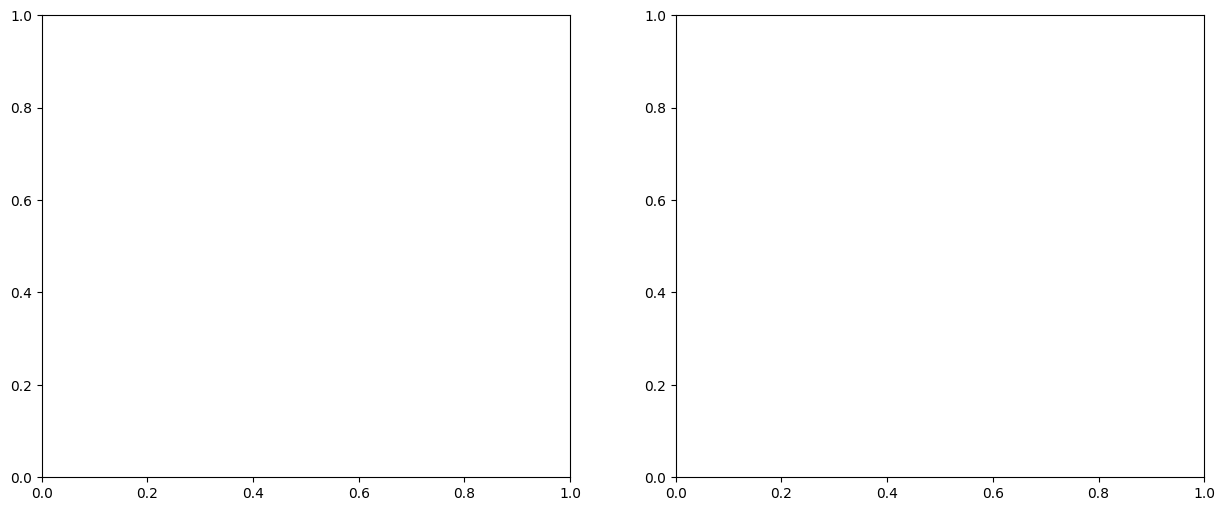

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))


In [53]:
original_data = pd.read_csv('C:/Users/20101/Desktop/penguins/penguins.csv').select_dtypes(include=[np.number])
sns.boxplot(data=original_data, ax=ax[0])
ax[0].set_title("Original Numeric Data")

Text(0.5, 1.0, 'Original Numeric Data')

In [55]:
scaled_data = pd.DataFrame(scaler.transform(data[numeric_features]), columns=numeric_features)
sns.boxplot(data=scaled_data, ax=ax[1])
ax[1].set_title("Scaled Numeric Data")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [51]:
missing_values_processed = data.isnull().sum()
print("Missing Values in Processed Data:\n", missing_values_processed)

Missing Values in Processed Data:
 id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
